In [0]:
# 라이브러리 불러오기
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <font style = "color:rgb(50,120,229)">Convolution </font>

The most basic type of image filtering is called **Convolution**. It is the basis of all linear filters. If you want to blur an image, you use convolution. If you want to sharpen an image, you use a different convolution kernel. If you want to detect edges, convolution is the first step. And yes, it is the same convolution used in state-of-the-art neural networks. 

## <font style = "color:rgb(50,120,229)">What is convolution?</font>

A convolution operation requires **two inputs**

1. An input image : For color images, convolution is performed on the R, G and B channels separately. 

2. A convolution kernel : This is a small matrix of numbers. An example of a 3x3 convolution kernel is shown on the right. As you can see, there are no restrictions on entries of the kernel. They could be any kind of numbers -- positive, negative, decimals etc. 

$$\begin{bmatrix} 0 & 1 & 3 \\ 0.1 & -1 & 1.5 \\ 4 & 3 & 1.7 \end{bmatrix}$$


The output is a **filtered** image. Depending on the implementation of convolution operation, the size of the filtered image is either equal to or slightly smaller than the original image. It will be clear why the dimension of the output image is smaller in the next few paragraphs. 

Let us discuss convolution on a grayscale image. **For color images, convolution is performed independently on each channel.**

The image below illustrates the convolution operation. The 3x3 convolution kernel is shown in blue. We move pixel by pixel in the image and extract a patch centered at the pixel and of the same size as the convolution kernel. This patch is shown in red. The output pixel value is calculated by multiplying corresponding elements of the image patch and the convolution kernel followed by adding up all the products.


![Convolution Operation](https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-convolution.png)


**Boundary Conditions?**

You may be thinking this is all good and fine, but what happens at the boundary? At the boundary, the convolution is not uniquely defined. There are a few options we can choose from.

1. **Ignore the boundary pixels :** If we discount the boundary pixels, the output image will be slightly smaller than the input image.

2. **Zero padding :** We can pad the input image with zeros at the boundary pixels to make it larger and then perform convolution.

3. **Replicate border :** The other option is to replicate the boundary pixels of the input image and then perform the convolution operation on this larger image. 

4. **Reflect border :** The preferred option is to reflect the border about the boundary. Reflecting ensures a smooth intensity transition of pixels at the boundary. 

By default OpenCV uses border type `BORDER_REFLECT_101` which is the same as option `4`.

### **<font style = "color:rgb(255,0,0)">Note:</font>** 

Strictly speaking, the convolution filtering described above is actually called correlation filtering. Correlation and convolution are exactly the same operation with one difference. In convolution, the kernel is rotated 180 degrees before doing the correlation operation. When the kernel is symmetric, correlation and convolution are the same.

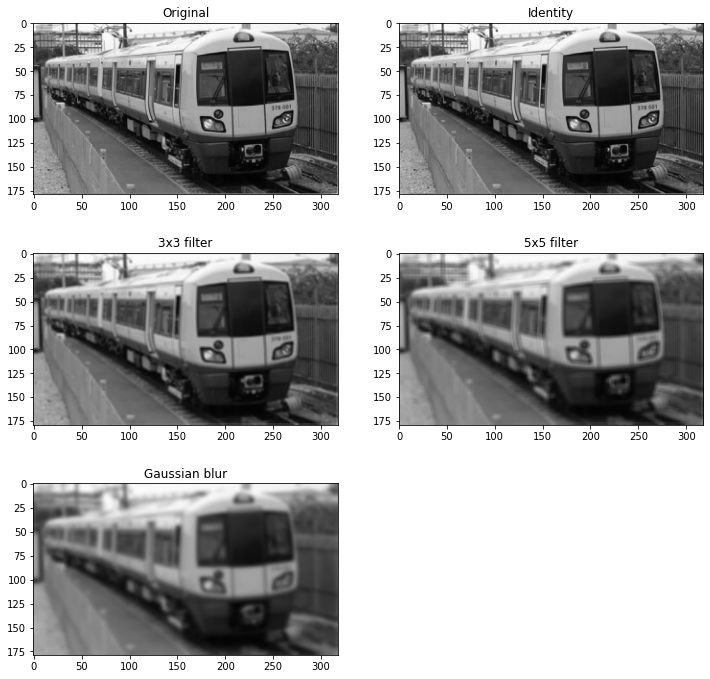

In [3]:
# 예제 - 블러링(Blurring)

# 이미지 파일 불러오기
img = cv2.imread('./train_input.png')

# 커널(Kernel) 생성
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]]) 
kernel_3x3 = np.ones((3,3), np.float32) / 9.0 
kernel_5x5 = np.ones((5,5), np.float32) / 25.0 

# 필터 적용 (컨볼루션(Convolution) 연산)
output1 = cv2.filter2D(img, -1, kernel_identity)
output2 = cv2.filter2D(img, -1, kernel_3x3) 
output3 = cv2.filter2D(img, -1, kernel_5x5) 

# 가우시안 블러링(GaussianBlur) 적용
# 시그마(sigma)를 2.0으로 설정
output4 = cv2.GaussianBlur(img, (0, 0), 2.0)

# 결과 출력
plt.figure(figsize=[12,12])
plt.subplot(321);plt.imshow(img[...,::-1]);plt.title("Original")
plt.subplot(322);plt.imshow(output1[...,::-1]);plt.title("Identity")
plt.subplot(323);plt.imshow(output2[...,::-1]);plt.title("3x3 filter")
plt.subplot(324);plt.imshow(output3[...,::-1]);plt.title("5x5 filter")
plt.subplot(325);plt.imshow(output4[...,::-1]);plt.title("Gaussian blur")

plt.show()

# 과제 1

*   이미지에 GaussianBlur를 적용하시오.
  *   sigma = 0.8, 3 일 때, 각각에 대해 연산하시오.
  *   sigma가 0.8일 때, 위의 3x3과 5x5 필터 중 어느 것과 비슷한가?





In [0]:
# Assignment 1 코드 작성

Generated Kernel
 [[0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


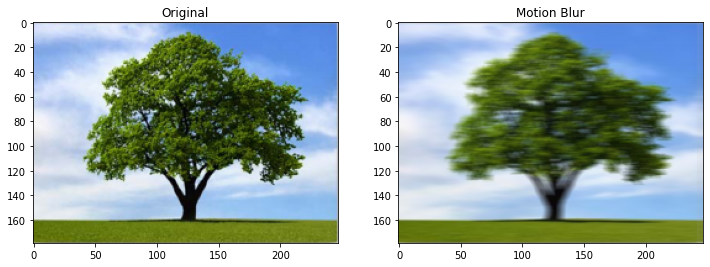

In [5]:
# 예제 - 모션 블러(Motion Blur)

# 이미지 파일 불러오기
img = cv2.imread('./tree_input.png')
 
size = 9 
 
# 커널(Kernel) 생성
kernel_motion_blur = np.zeros((size, size)) 
kernel_motion_blur[int((size-1)/2), :] = np.ones(size) 
kernel_motion_blur = kernel_motion_blur / size 

# Numpy Float 출력 옵션 설정 (소수점 2번째 자리까지 출력)
np.set_printoptions(precision=2)
print('Generated Kernel\n', kernel_motion_blur)
 
# 필터 적용 (컨볼루션(Convolution) 연산)
output = cv2.filter2D(img, -1, kernel_motion_blur) 

# 결과 출력
plt.figure(figsize=[12,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(output[...,::-1]);plt.title("Motion Blur")

plt.show()

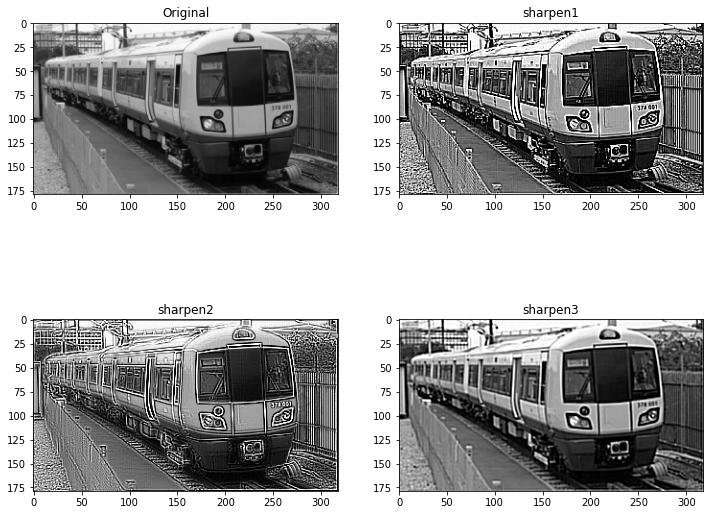

In [6]:
# 예제 - 샤프닝(Sharpening)

# 이미지 파일 불러오기
img = cv2.imread('./train_input.png')

# 커널(Kernel) 생성
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) 
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]]) 
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1], 
                             [-1, 2, 2, 2,-1], 
                             [-1, 2, 8, 2,-1], 
                             [-1, 2, 2, 2,-1], 
                             [-1,-1,-1,-1,-1]]) / 8.0  
 
# 필터 적용 (컨볼루션(Convolution) 연산)
output1 = cv2.filter2D(img, -1, kernel_sharpen_1) 
output2 = cv2.filter2D(img, -1, kernel_sharpen_2) 
output3 = cv2.filter2D(img, -1, kernel_sharpen_3) 

# 결과 출력
plt.figure(figsize=[12,10])
plt.subplot(221);plt.imshow(img[...,::-1]);plt.title("Original")
plt.subplot(222);plt.imshow(output1[...,::-1]);plt.title("sharpen1")
plt.subplot(223);plt.imshow(output2[...,::-1]);plt.title("sharpen2")
plt.subplot(224);plt.imshow(output3[...,::-1]);plt.title("sharpen3")

plt.show()

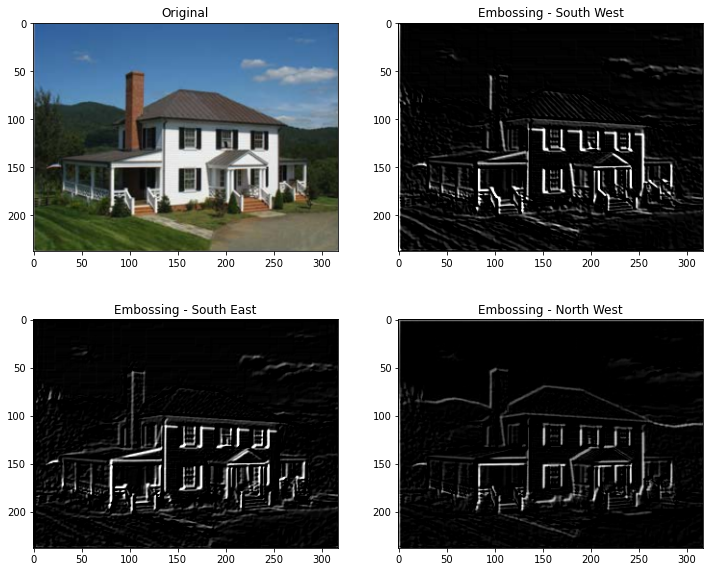

In [7]:
# 예제 - 엠보싱(Embossing)

# 이미지 파일 불러오기
img = cv2.imread('./house_input.png')
 
# 커널(Kernel) 생성 
kernel_emboss_1 = np.array([[0,-1,-1], [1,0,-1], [1,1,0]]) 
kernel_emboss_2 = np.array([[-1,-1,0], [-1,0,1], [0,1,1]]) 
kernel_emboss_3 = np.array([[1,0,0], [0,0,0], [0,0,-1]]) 
 
# BGR에서 GRAY로 변경
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
 
# 필터 적용 (컨볼루션(Convolution) 연산)
output1 = cv2.filter2D(gray_img, -1, kernel_emboss_1) 
output2 = cv2.filter2D(gray_img, -1, kernel_emboss_2)
output3 = cv2.filter2D(gray_img, -1, kernel_emboss_3) 

# 결과 출력
plt.figure(figsize=[12,10])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original")
plt.subplot(222);plt.imshow(output1, cmap='gray');plt.title("Embossing - South West")
plt.subplot(223);plt.imshow(output2, cmap='gray');plt.title("Embossing - South East")
plt.subplot(224);plt.imshow(output3, cmap='gray');plt.title("Embossing - North West")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


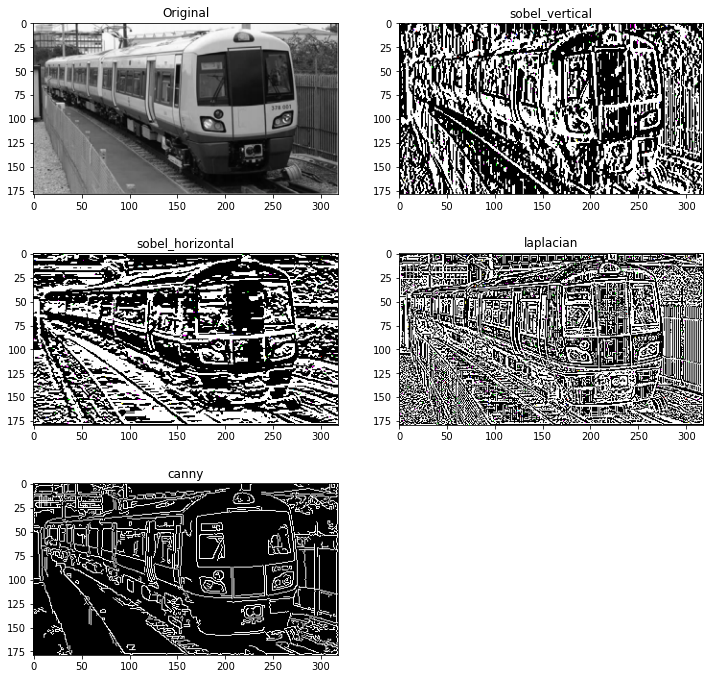

In [8]:
# 예제 - 엣지 검출(Edge Detection)

# 이미지 파일 불러오기
img = cv2.imread('./train_input.png')

# 소벨(Sobel) 필터 적용 (수직선 방향의 엣지를 검출)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# 소벨(Sobel) 필터 적용 (수평선 방향의 엣지를 검출)
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) 

# 라플라시안(Laplacian) 필터 적용
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# 캐니(Canny) 필터 적용
canny = cv2.Canny(img, 50, 240)

# 결과 출력
plt.figure(figsize=[12,12])
plt.subplot(321);plt.imshow(img[:,:,::-1]);plt.title("Original")
plt.subplot(322);plt.imshow(sobel_vertical, cmap='gray');plt.title("sobel_vertical")
plt.subplot(323);plt.imshow(sobel_horizontal, cmap='gray');plt.title("sobel_horizontal")
plt.subplot(324);plt.imshow(laplacian, cmap='gray');plt.title("laplacian")
plt.subplot(325);plt.imshow(canny, cmap='gray');plt.title("canny")

plt.show()

# 과제 2

*   과제 1번의 결과에서 엣지 검출을 수행하시오.
  *   Gaussian Blurring이 적용되어 있는 과제 1번에 Sobel, Laplacian, Canny를 적용하시오.
  *   Gaussian Blurring이 적용되어 있지 않은 것과 비교하였을 때, 어떻게 변했는지 설명하시오.





In [0]:
# Assignment 2 코드 작성

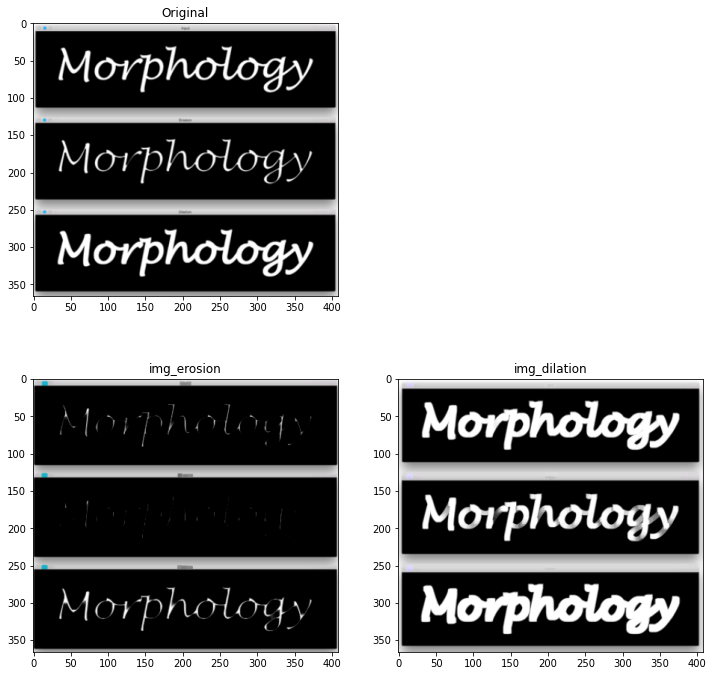

In [13]:
# 예제 - 모폴로지(Morphology)

# 이미지 파일 불러오기
img = cv2.imread('./text_input.png')

# 커널(Kernel) 생성
kernel = np.ones((5,5), np.uint8) 

# 침식 연산 적용
img_erosion = cv2.erode(img, kernel, iterations=1)

# 팽창 연산 적용
img_dilation = cv2.dilate(img, kernel, iterations=1) 

# 결과 출력
plt.figure(figsize=[12,12])
plt.subplot(221);plt.imshow(img, cmap='gray');plt.title("Original")
plt.subplot(223);plt.imshow(img_erosion, cmap='gray');plt.title("img_erosion")
plt.subplot(224);plt.imshow(img_dilation, cmap='gray');plt.title("img_dilation")

plt.show()

# 과제 3

*   위의 이미지에 opening, closing의 결과를 구하시오.
  *   cv2.morphologyEx() 함수를 이용

In [0]:
# Assignment 3 코드 작성

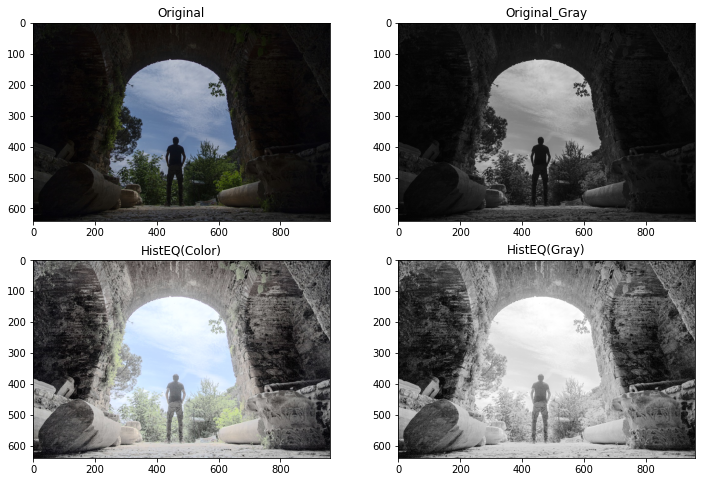

In [12]:
# Histogram Equalization : Gray image

img = cv2.imread('./low_cont.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# equalize the histogram of the Gray image 
outputGray = cv2.equalizeHist(imgGray)

# for color image
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# show results
plt.figure(figsize=[12,8])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original")
plt.subplot(222);plt.imshow(imgGray, cmap='gray');plt.title("Original_Gray")
plt.subplot(224);plt.imshow(outputGray, cmap='gray');plt.title("HistEQ(Gray)")
plt.subplot(223);plt.imshow(output[:,:,::-1]);plt.title("HistEQ(Color)")

plt.show()